<a href="https://colab.research.google.com/github/xvh422/L4-Project/blob/main/Plot%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eagleSqlTools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

con = sql.connect("vwg533", password = "FZtn087h")

In [3]:
sim_name = 'RefL0100N1504'
sim_size = 100.
zs = []
halos = []
bhs = []
sfrs = []

# For snapnums 28, 26, 23, 19, 14 ==> z = 0.0, 2.29, 5.19, 7.93, 10.86
galaxy_ids = [21573586, 21379523, 21730540, 13259036, 21109774]


for i in range(len(galaxy_ids)):
  Query = "SELECT \
              gal.Redshift as z, \
              gal.MassType_DM as halo, \
              gal.MassType_BH as bh, \
              gal.StarFormationRate as sfr \
            FROM \
              %s_Subhalo as gal, \
              %s_Subhalo as ref \
            WHERE \
              ref.GalaxyID=%s and \
              ((gal.SnapNum > ref.SnapNum and ref.GalaxyID \
              between gal.GalaxyID and gal.TopLeafID) or \
              (gal.SnapNum <= ref.SnapNum and gal.GalaxyID \
              between ref.GalaxyID and ref.TopLeafID)) \
            ORDER BY \
              gal.Redshift"%(sim_name, sim_name, galaxy_ids[i])

  Data = sql.execute_query(con, Query)
  zs.append(Data['z'])
  halos.append(Data['halo'])
  bhs.append(Data['bh'])
  sfrs.append(Data['sfr'])

In [5]:
def log_with_zeros(data): # Replaces zeroes with the smallest nonzero value.
  logs = np.empty(len(data))
  for i in range(0, len(data)):
    if data[i] == 0.0:
      logs[i] = 99.
    else:
      logs[i] = np.log10(data[i])
  m = logs.min()
  for j in range(0, len(logs)):
    if logs[j] == 99.:
      logs[j] = m
    else:
      logs[j] = logs[j]
  return logs

def divide_with_zeros(n, d):
  res = np.empty(len(n))
  for i in range(len(n)):
    if d[i] == 0:
      res[i] = 0
    else:
      res[i] = n[i]/d[i]
  return res

def remove_zeros(data):
  out = []
  for i in range(len(data)):
    if data[i] == 0:
      out = out
    else:
      out = out + [data[i]]
  return np.array(out)

In [6]:
Times = np.array([13.62, 13.53, 13.32, 13.25, 13.16, 13.04, 12.86, 12.75, 12.63, 12.46, 12.25, 12.01, 11.66, 11.16,
                  10.86, 10.53, 10.05, 9.49, 8.86, 7.93, 7.37, 6.71, 6.01, 5.19, 4.16, 3.23, 2.29, 1.24, 0.0]) # len = 29

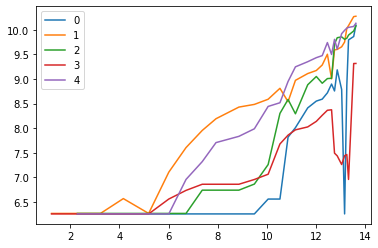

In [13]:
plt.figure()

for i in range(len(bhs)):
  d = 29 - len(bhs[i])
  plt.plot(Times[0:-d], log_with_zeros(bhs[i]), label = i)

plt.legend()
plt.show()

In [15]:
Start_times = np.array([10.53, 5.19, 8.86, 10.05, 6.01])

In [21]:
Corrected = []

for i in range(len(Start_times)):
  c = Times - Start_times[i]
  Corrected.append(c)